In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings 
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)
%matplotlib inline

In [2]:
df = pd.read_csv("house_price_mumbai.csv")

In [3]:
data = df.copy()

In [4]:
data.head()

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45 Cr


In [5]:
data.tail()

,BHK,project,Location,City,Total sqft,price_sqft,price
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,Mumbai,966,"4,968",48 L
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,Mumbai,500,"5,200",26 L
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,Mumbai,610,"5,573",34 L
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,Mumbai,610,"5,245",32 L
3979,1 BHK Apartment,Navkar City Phase I Part 1Naigaon East,Naigaon East,Mumbai,590,"6,101",36 L


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BHK         3980 non-null   object
 1   project     3127 non-null   object
 2   Location    3980 non-null   object
 3   City        3980 non-null   object
 4   Total sqft  3980 non-null   int64 
 5   price_sqft  3980 non-null   object
 6   price       3980 non-null   object
dtypes: int64(1), object(6)
memory usage: 217.8+ KB


In [7]:
data.shape

(3980, 7)

## Data Cleaning

In [8]:
data.columns

Index(['BHK', 'project', 'Location', 'City', 'Total sqft', 'price_sqft',
       'price'],
      dtype='object')

In [9]:
# extrsct bhk number from data and convert in to numeric
data["BHK"] = data["BHK"].apply(lambda x:x.split(" ")).str[0]
data["BHK"] = data["BHK"].apply(lambda x:x.replace("R","1")).astype(int)

In [10]:
# remove comma and convert in to numeric
data["price_sqft"] = data["price_sqft"].apply(lambda x:x.replace(",","")).astype(int)

In [11]:
# this function convert currency remove words
def convert_to_INR(x):
    if 'Cr' in x:
        return float(x.replace(' Cr', '')) * 10000000
    elif 'L' in x:
        return float(x.replace(' L', '')) * 100000
    else:
        return None

In [12]:
data["price"] = data["price"].apply(convert_to_INR)

In [13]:
# drop unwanted colums
data.drop("City",axis=1,inplace=True)

In [14]:
# check duplicets
data.duplicated().sum()

1106

In [15]:
# drop all duplecetvalues
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(2874, 6)

In [17]:
data.isnull().sum()

BHK             0
project       709
Location        0
Total sqft      0
price_sqft      0
price           0
dtype: int64

In [18]:
# fillna with mode of project
data["project"] = data["project"].fillna("Agarwal ParamountVirar")

In [19]:
data.head()

,BHK,project,Location,Total sqft,price_sqft,price
0,3,SHREE KRISHNA SangamChembur,Chembur,984,31000,30500000.0
1,2,Ekdanta 24 KaratKurla,Kurla,598,23913,14200000.0
2,2,Liberty Bay VueMalad West,Malad West,738,21000,15400000.0
3,3,Thalia Vrindavan FloraRasayani,Rasayani,644,10676,6875000.0
4,2,Mayfair The ViewVikhroli,Vikhroli,582,24914,14500000.0


In [20]:
data.shape

(2874, 6)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2874 entries, 0 to 3979
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BHK         2874 non-null   int32  
 1   project     2874 non-null   object 
 2   Location    2874 non-null   object 
 3   Total sqft  2874 non-null   int64  
 4   price_sqft  2874 non-null   int32  
 5   price       2874 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 134.7+ KB


## EDA

In [22]:
# saprate numerical and catigorical features
catigerocal_features = data.dtypes[data.dtypes == "object"].index

In [23]:
catigerocal_features

Index(['project', 'Location'], dtype='object')

In [24]:
numerical_features = data.dtypes[data.dtypes != "object"].index

In [25]:
numerical_features

Index(['BHK', 'Total sqft', 'price_sqft', 'price'], dtype='object')

Index(['BHK', 'Total sqft', 'price_sqft', 'price'], dtype='object')


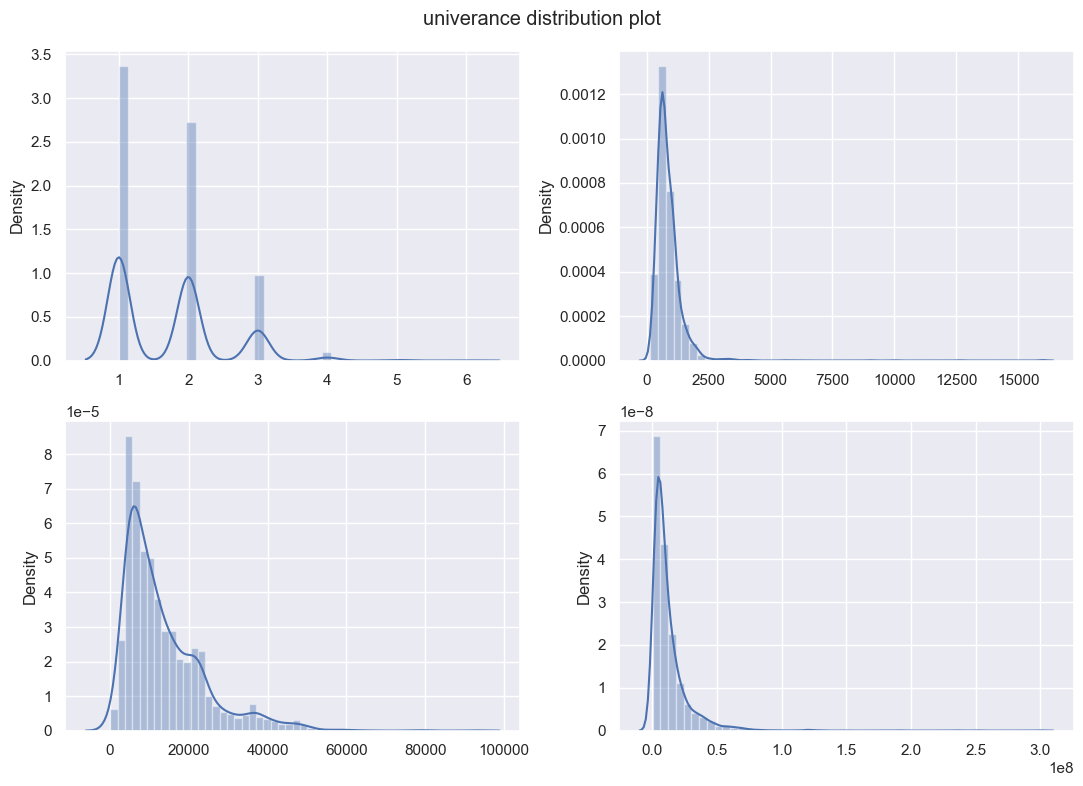

In [28]:
print(numerical_features)
try:
    plt.suptitle("univerance distribution plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(2,2,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)
        

Index(['BHK', 'Total sqft', 'price_sqft', 'price'], dtype='object')


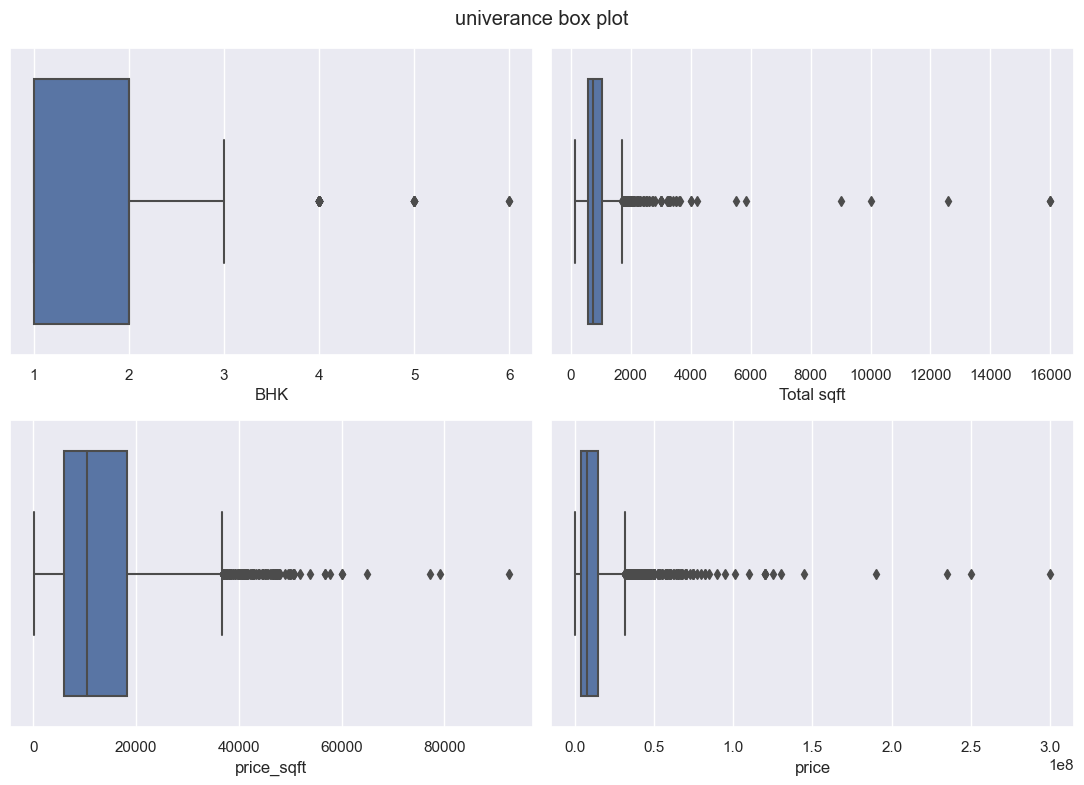

In [29]:
# check the outlayer using boxplot
print(numerical_features)
try:
    plt.suptitle("univerance box plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(2,2,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<Figure size 1000x1000 with 0 Axes>

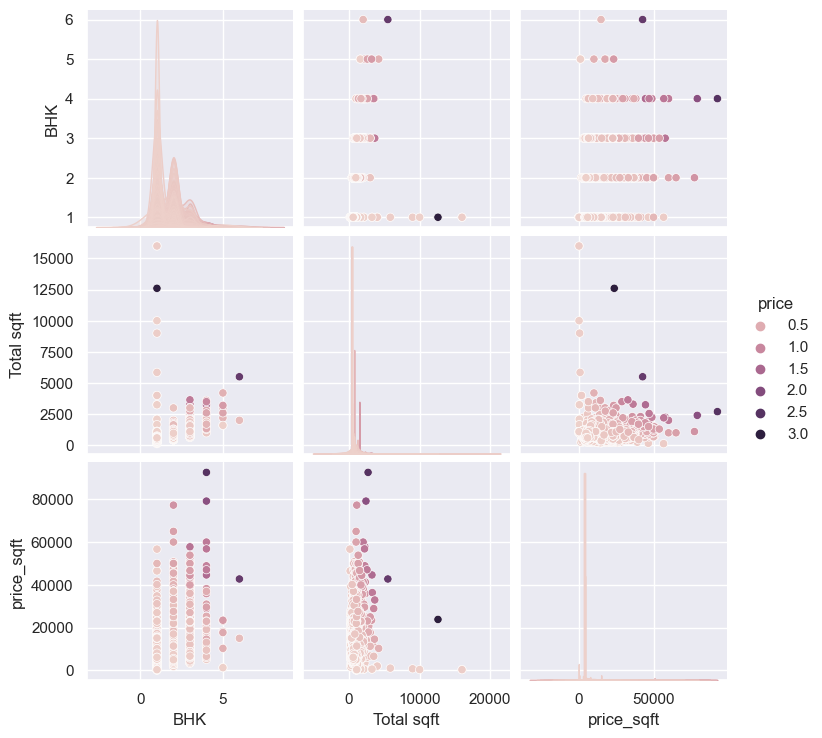

In [31]:
plt.figure(figsize=(10,10))
sns.pairplot(data,hue="price")
plt.show()

<AxesSubplot:>

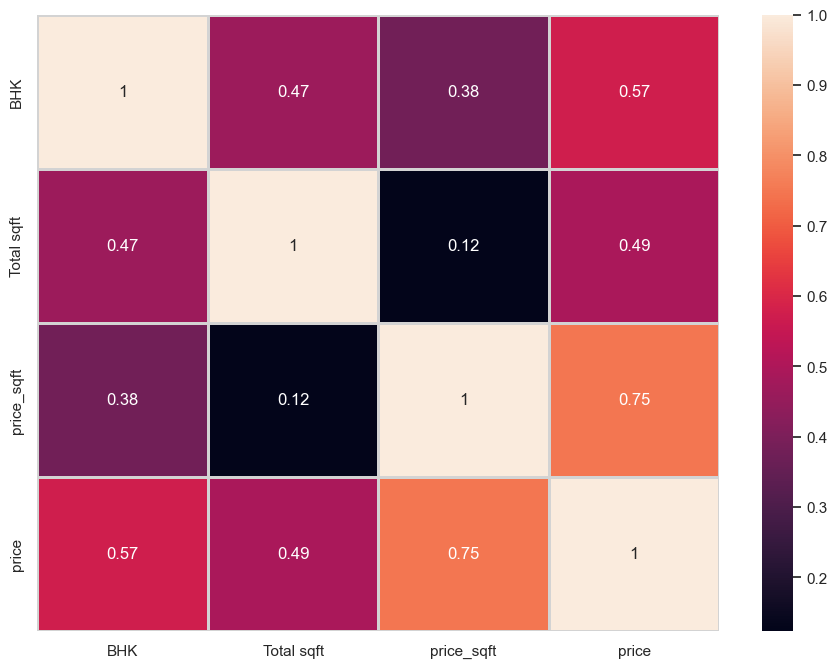

In [79]:
sns.heatmap(data.corr(),annot = True, linewidths = 2, linecolor = 'lightgrey')

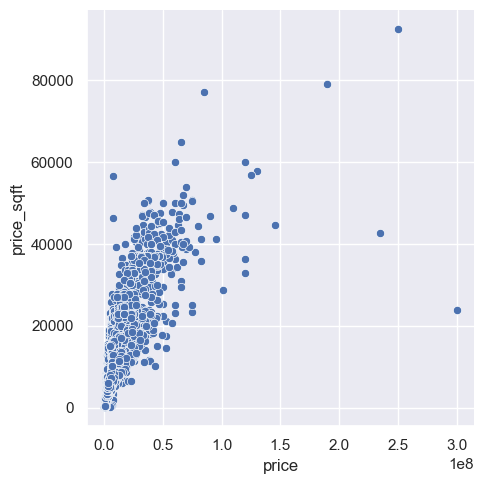

In [81]:
sns.relplot(x="price",y="price_sqft",data=data)

In [45]:
top20highprice_location = data.groupby("Location")["price"].mean().sort_values(ascending=False).reset_index().head(20)

In [46]:
top20highprice_location

,Location,price
0,Juhu,1.433750e+08
1,Prabhadevi,9.375000e+07
2,Napeansea Road,7.833333e+07
3,Worli,6.330000e+07
4,Cuffe Parade,6.250000e+07
5,Khar,5.800000e+07
6,Lower Parel,5.604545e+07
7,Santacruz West,5.269286e+07
8,Mumbai Central,4.900000e+07
9,Bandra West,4.734909e+07


<AxesSubplot:title={'center':'top20 high price locations'}, xlabel='price', ylabel='Location'>

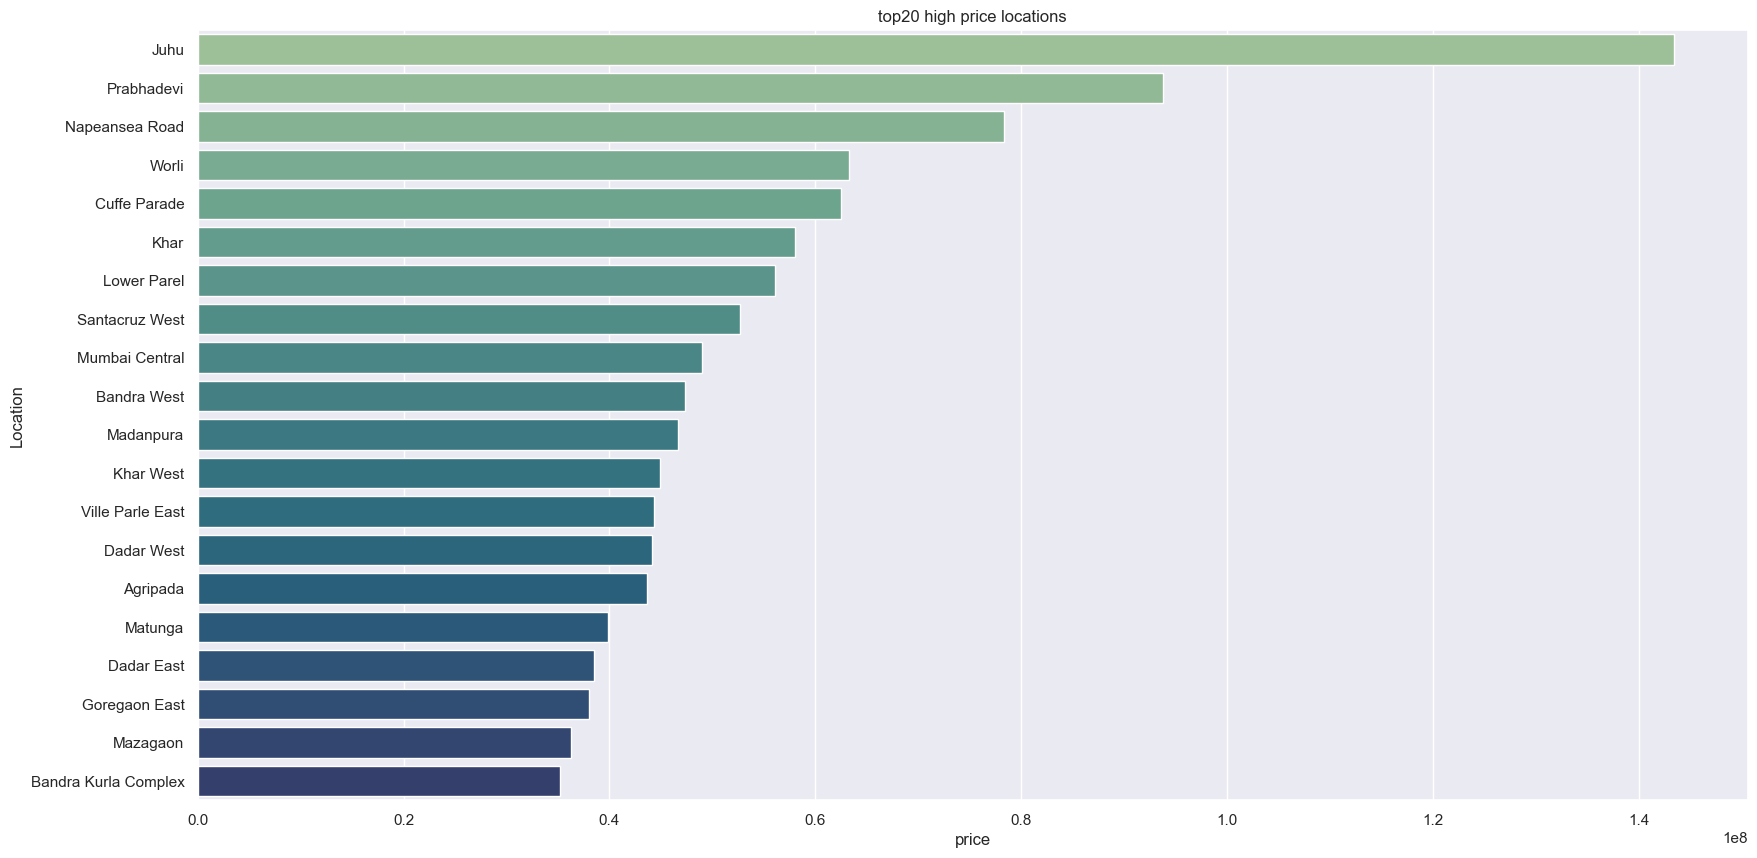

In [50]:
plt.figure(figsize=(20,10))
plt.title("top20 high price locations")
sns.barplot(x="price",y="Location",data=top20highprice_location,palette='crest')

In [63]:
top5projects = data.groupby("project")["price"].mean().sort_values(ascending=False).reset_index().head(5)

In [64]:
top5projects

,project,price
0,Kalpataru SolitaireJuhu,190000000.0
1,Wadhwa PrabhadeviPrabhadevi,145000000.0
2,Hubtown Ackruti AsthaNapeansea Road,130000000.0
3,K Raheja VivareaAgripada,120000000.0
4,Indiabulls SkyLower Parel,120000000.0


<AxesSubplot:title={'center':'top5 high price priject'}, xlabel='project', ylabel='price'>

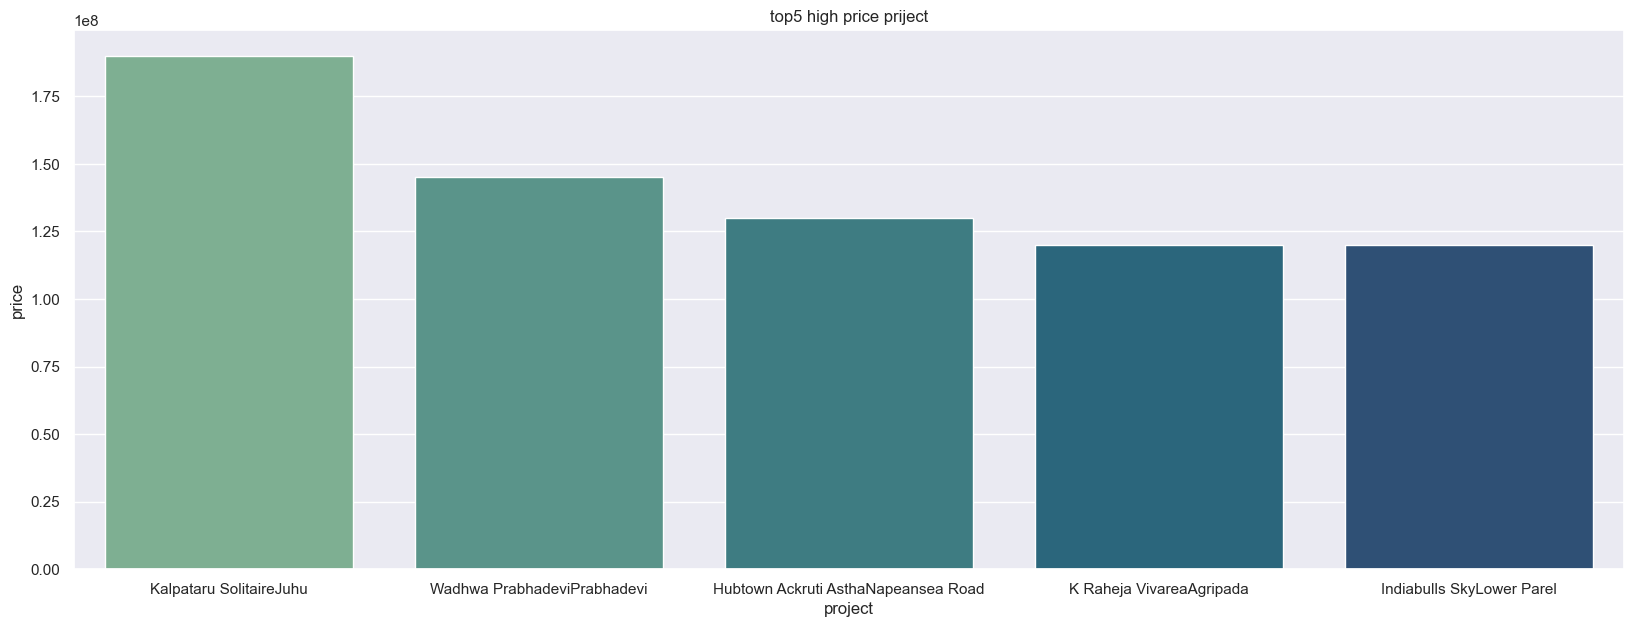

In [85]:
plt.figure(figsize=(20,7))
plt.title("top5 high price priject")
sns.barplot(x="project",y="price",data=top5projects,palette='crest')

In [87]:
bhk = data.groupby("BHK")["price"].mean().sort_values(ascending=False).reset_index().head(7)

In [88]:
bhk

,BHK,price
0,6,1.325000e+08
1,4,6.110769e+07
2,5,3.928571e+07
3,3,2.846342e+07
4,2,1.355014e+07
5,1,5.480687e+06


<AxesSubplot:title={'center':'BHK prices'}, xlabel='BHK', ylabel='price'>

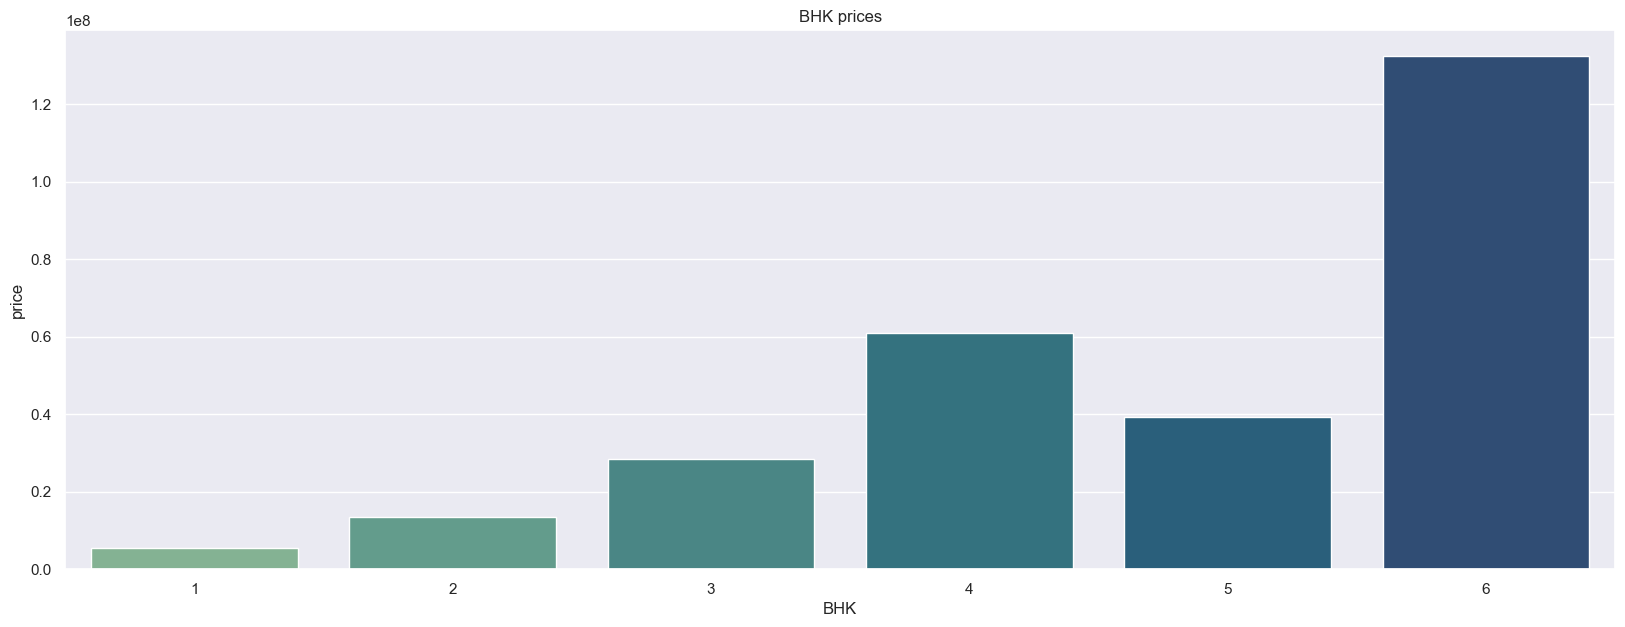

In [90]:
plt.figure(figsize=(20,7))
plt.title("BHK prices")
sns.barplot(x="BHK",y="price",data=bhk,palette='crest')

In [94]:
sqrt = data.groupby("Location")["Total sqft"].mean().sort_values(ascending=False).reset_index().head(10)

In [95]:
sqrt

,Location,Total sqft
0,Dahanu,16000.000000
1,Uttan,4000.000000
2,Juhu,2695.000000
3,Shir Gaon,2454.000000
4,Dadar West,2433.333333
5,Gorai,2250.000000
6,Prabhadevi,2230.500000
7,Saphale,1890.000000
8,Madanpura,1650.000000
9,Goregaon East,1645.965517


<AxesSubplot:title={'center':'location vs sqrt'}, xlabel='Location', ylabel='Total sqft'>

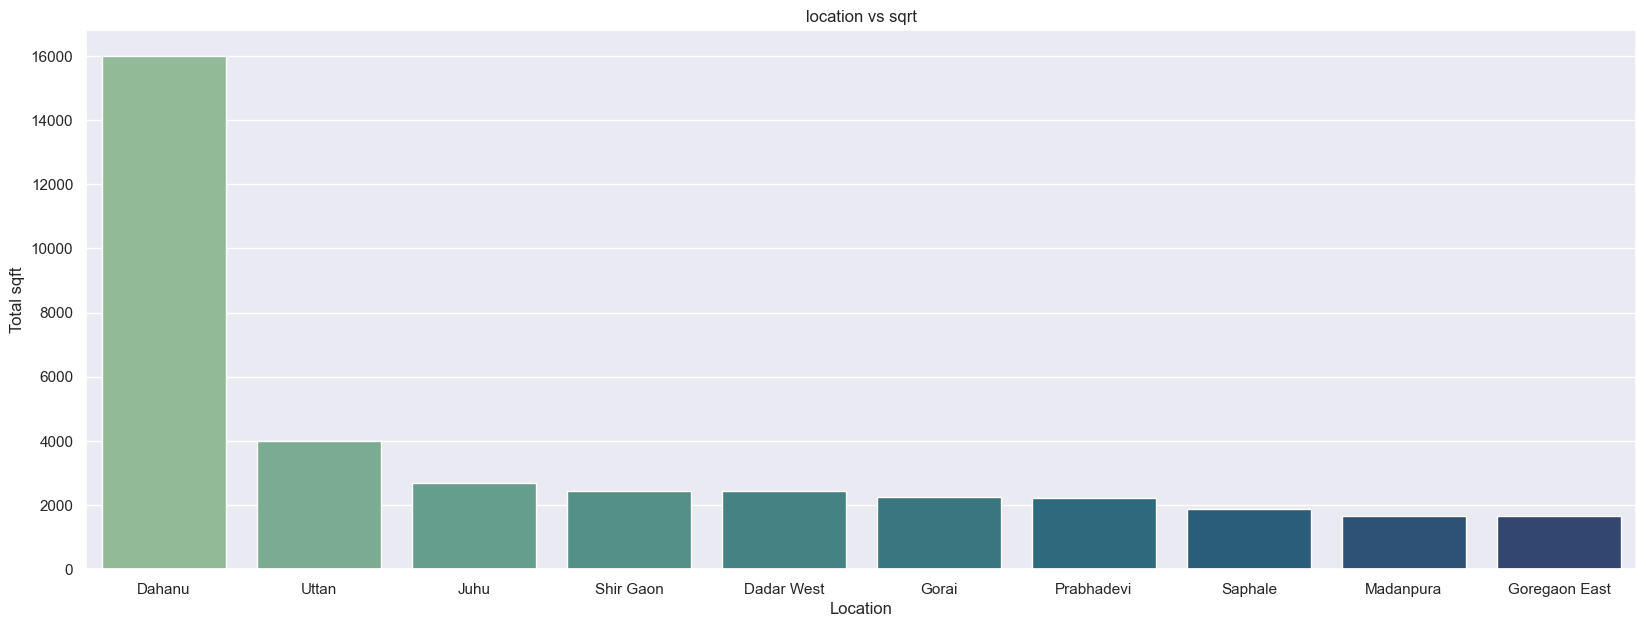

In [96]:
plt.figure(figsize=(20,7))
plt.title("location vs sqrt")
sns.barplot(x="Location",y="Total sqft",data=sqrt,palette='crest')

In [51]:
data

,BHK,project,Location,Total sqft,price_sqft,price
0,3,SHREE KRISHNA SangamChembur,Chembur,984,31000,30500000.0
1,2,Ekdanta 24 KaratKurla,Kurla,598,23913,14200000.0
2,2,Liberty Bay VueMalad West,Malad West,738,21000,15400000.0
3,3,Thalia Vrindavan FloraRasayani,Rasayani,644,10676,6875000.0
4,2,Mayfair The ViewVikhroli,Vikhroli,582,24914,14500000.0
...,...,...,...,...,...,...
3974,1,Global Prestige Wing EVasai,Vasai,670,5223,3500000.0
3975,2,Global Prestige Wing EVasai,Vasai,966,4968,4800000.0
3977,1,Navkar Navkar CityNaigaon East,Naigaon East,610,5573,3400000.0
3978,1,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,5245,3200000.0
